In [64]:
import pandas as pd
from statsmodels.tsa.arima import model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error

In [48]:
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col=['Month'])


In [49]:
col, lamb = boxcox(df['#Passengers'])

In [50]:
df['#Passengers'] = col

In [51]:
df

,#Passengers
Month,
1949-01-01,6.827488
1949-02-01,6.932820
1949-03-01,7.161889
1949-04-01,7.114609
1949-05-01,6.983785
...,...
1960-08-01,10.684045
1960-09-01,10.234569
1960-10-01,9.992156


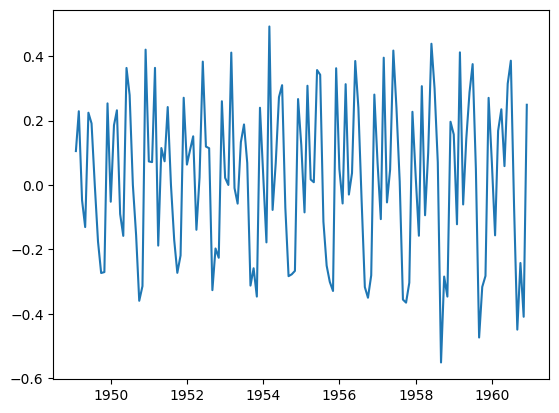

In [53]:
plt.plot(df.diff().dropna())

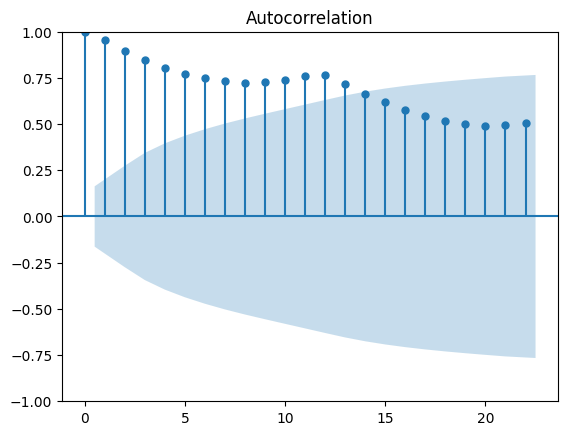

In [55]:
plot_acf(df.dropna());

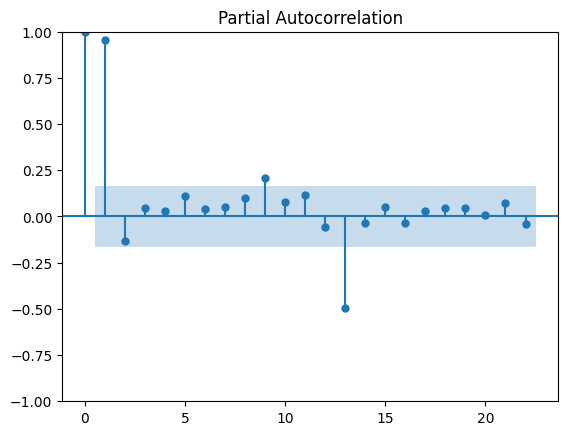

In [56]:
plot_pacf(df.dropna());

In [ ]:
#p = 1
#q = 0

In [57]:
m = model.ARIMA(df,order=(1,0,0))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
fitted = m.fit()

In [61]:
preds = fitted.predict(start=df.index[0],end=df.index[-1])

In [62]:
preds

1949-01-01     8.513395
1949-02-01     6.866463
1949-03-01     6.969360
1949-04-01     7.193133
1949-05-01     7.146946
                ...    
1960-08-01    10.699710
1960-09-01    10.633864
1960-10-01    10.194780
1960-11-01     9.957970
1960-12-01     9.557901
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

In [66]:
rmse = mean_squared_error(df,preds,squared=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
rmse

np.float64(0.2793075783203607)